# Wages 1 Dataset Analysis

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [60]:
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Wages1.csv')

### What kinds of variables does it have? What do they “look” like?
### What kinds of stories might be possible from the data?

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 4 columns):
exper     3294 non-null int64
sex       3294 non-null object
school    3294 non-null int64
wage      3294 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 103.1+ KB


In [5]:
df.head()

,exper,sex,school,wage
0,9,female,13,6.315296
1,12,female,12,5.479770
2,11,female,11,3.642170
3,9,female,14,4.593337
4,8,female,14,2.418157


In [6]:
df['sex'].value_counts()

male      1725
female    1569
Name: sex, dtype: int64

In [7]:
df['exper'].value_counts()

9     654
8     632
7     471
6     359
10    328
11    229
5     212
4     133
12    110
3      66
13     35
14     23
2      16
15     10
16      9
18      3
1       2
17      2
Name: exper, dtype: int64

In [8]:
df['school'].value_counts()

12    1188
11     661
10     399
13     339
14     264
9      161
15     134
8       86
7       24
16      16
6       14
5        5
4        2
3        1
Name: school, dtype: int64

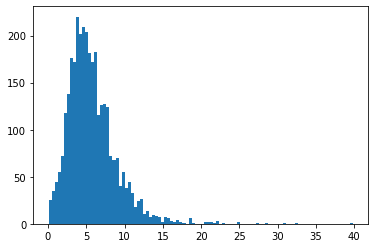

In [75]:
plt.hist(df['wage'], bins=100)
plt.show()

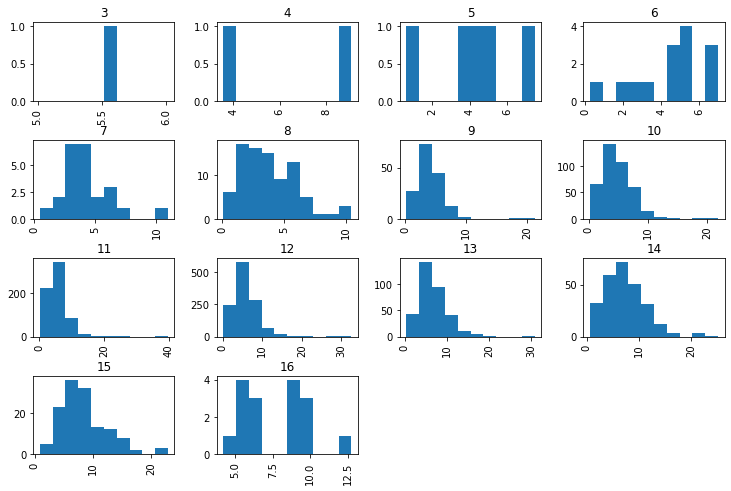

In [10]:
df['wage'].hist(by = df['school'], figsize=(12,8))
plt.show()

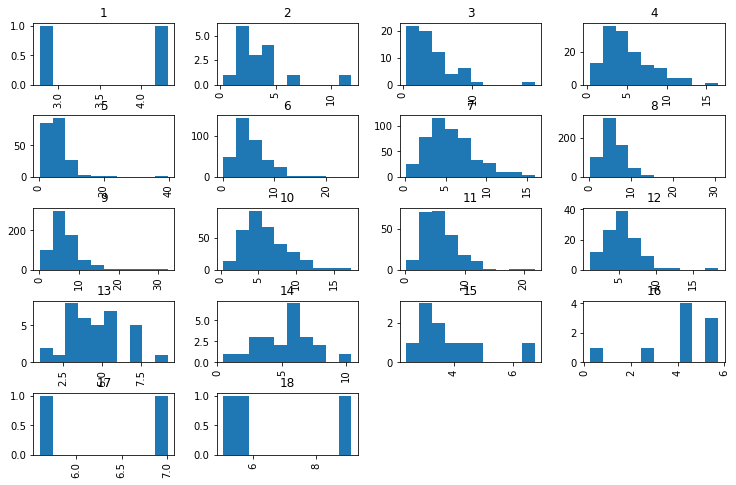

In [11]:
df['wage'].hist(by = df['exper'], figsize=(12,8))
plt.show()

exper wage correlation: 0.05138050749036071


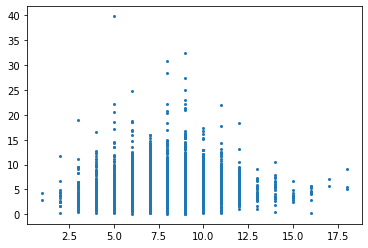

In [77]:
# help(plt.plot)
plt.plot(df['exper'], df['wage'], 'o', markersize=2)
print('exper wage correlation:', df['exper'].corr(df['wage']))

school wage correlation: 0.282492487510573


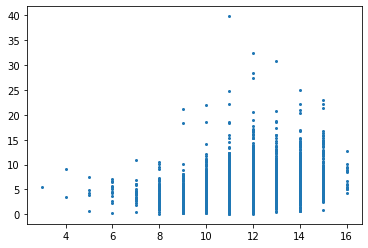

In [74]:
plt.plot(df['school'], df['wage'], 'o', markersize=2)
print('school wage correlation:', df['school'].corr(df['wage']))

In [33]:
mdf = df.loc[df['sex']=='male']
fdf = df.loc[df['sex']=='female']

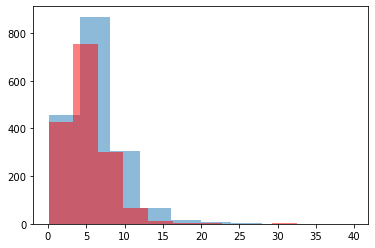

In [34]:
plt.hist(mdf['wage'], alpha=.5)
plt.hist(fdf['wage'], alpha=.5, color='r')
plt.show()

In [35]:
print('male wage normality', stats.shapiro(mdf['wage']))
print('female wage normality', stats.shapiro(fdf['wage']))

male wage normality (0.8856816291809082, 6.741854994599298e-34)
female wage normality (0.891283392906189, 6.969789300163891e-32)


In [50]:
print('Shapiro Wilk says this is not a normal distribution. I will run a nonparametric test')

Shapiro Wilk says this is not a normal distribution. I will run a nonparametric test


In [52]:
print(mdf['wage'].mean() - fdf['wage'].mean())

1.1660972915335135


In [51]:
print('kruskal test', stats.kruskal(mdf['wage'], fdf['wage']))
print('Mann-Whitney U test', stats.mannwhitneyu(mdf['wage'], fdf['wage']))

kruskal test KruskalResult(statistic=113.11291370495626, pvalue=2.038302969576057e-26)
Mann-Whitney U test MannwhitneyuResult(statistic=1063330.5, pvalue=1.0193520359789065e-26)


In [40]:
print('both tests yield a statistical significance enough to reject the null hypothesis that the distributions share a mean.')

both tests yield a statistical significance enough to reject the null hypothesis that the distributions share a mean.


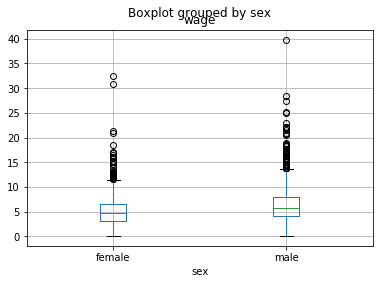

In [43]:
df.boxplot('wage', by='sex')

In [44]:
graduated = df.loc[df['school'] >= 12]
no_grad = df.loc[df['school'] < 12]

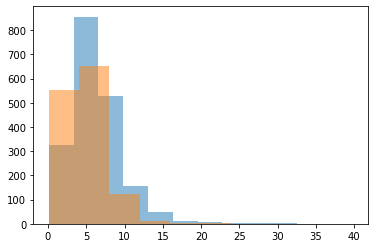

In [46]:
plt.hist(graduated['wage'], alpha=.5)
plt.hist(no_grad['wage'], alpha=.5)
plt.show()

In [47]:
stats.kruskal(graduated['wage'], no_grad['wage'])

KruskalResult(statistic=149.33809942307562, pvalue=2.419009153355112e-34)

In [48]:
graduated.wage.mean() - no_grad.wage.mean()

1.3010508611381324

In [53]:
moredf = df.loc[df['exper'] > df['exper'].mean()]
lessdf = df.loc[df['exper'] <= df['exper'].mean()]

In [55]:
print(moredf.shape)
print(lessdf.shape)

(1403, 4)
(1891, 4)


(array([650., 907., 263.,  51.,  11.,   5.,   1.,   2.,   0.,   1.]),
 array([ 0.09799118,  4.06908378,  8.04017638, 12.01126899, 15.98236159,
        19.95345419, 23.92454679, 27.89563939, 31.866732  , 35.8378246 ,
        39.8089172 ]),
 <a list of 10 Patch objects>)

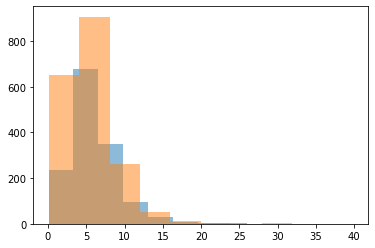

In [56]:
plt.hist(moredf['wage'], alpha=.5)
plt.hist(lessdf['wage'], alpha=.5)

In [57]:
stats.kruskal(moredf.wage, lessdf.wage)

KruskalResult(statistic=16.262515639120704, pvalue=5.514412418990479e-05)

In [58]:
moredf.wage.mean() - lessdf.wage.mean()

0.36849212801262343